# Airbnb berlin rental market review.

# 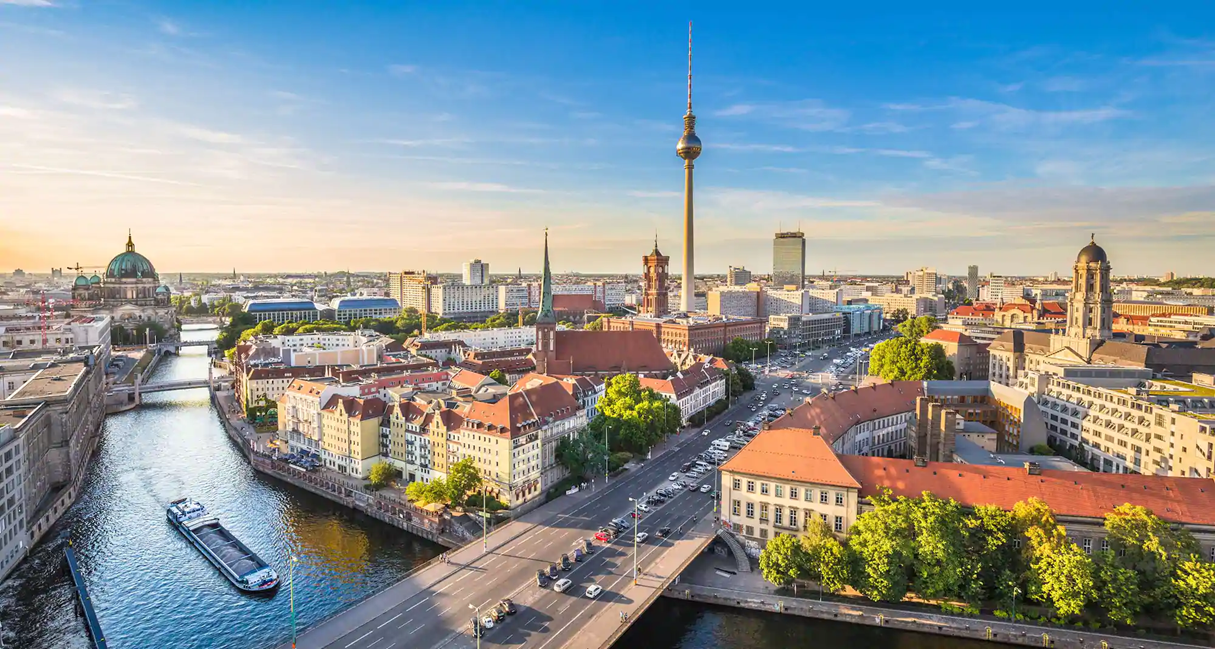

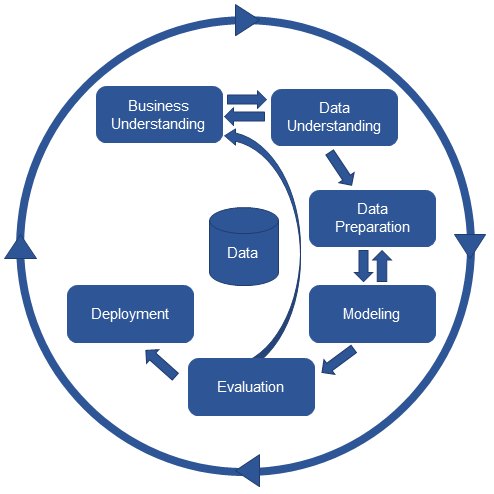

Fig1.This data review follows the CRISP-DM process.
( the deployment step in this case is a blog post)

## Section 1 :Buisness understanding.

For this review of Airbnb data from the city of Berlin we have a number of key questions to be answered.

#### Question 1. Which areas are most popular?


#### Question 2. Which is the most popular rental accommodation type?


#### Question 3. How is the price of rental accommodation determined by location and the number of guests that can stay?


#### Question 4. How are reviews distributed?


#### Question 5. Is worth being a super host?





In [1]:
#to handle numberical data
import pandas as pd
from scipy import stats
from scipy.stats import norm 
import numpy as np

#for graphing/visuals
import seaborn as sns
import matplotlib.pyplot as plt

#to work with OS.
import os #https://docs.python.org/3/library/os.html

#to create maps
import folium #http://python-visualization.github.io/folium/
from folium.plugins import HeatMap

#to handle spliting data set for training,testing and evaluating a model.
#https://github.com/scikit-learn/scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

#to baseline model data #https://xgboost.readthedocs.io/en/latest/python/python_intro.html#install-xgboost
import xgboost as xgb
from xgboost import plot_importance




-------------------------------------------------------------------------------------------------------------------------------

## Section 2: Data Understanding:

### Gather:

In [2]:
#set source directory.
# download the file from http://data.insideairbnb.com/germany/be/berlin/2021-02-20/data/listings.csv.gz
#save in C drive from Https as files are zipped

os.chdir("C:\\Users\\John\\Documents\\Data_sets")
os.getcwd()

'C:\\Users\\John\\Documents\\Data_sets'

In [3]:
#import our data into a pandas dataframe
Berlin_raw=pd.read_csv('Berlin_AiRBNB.csv')
Berlin_raw.head()

id                        listing_url     scrape_id last_scraped  \
0  2015  https://www.airbnb.com/rooms/2015  2.021020e+13   21/02/2021   
1  3176  https://www.airbnb.com/rooms/3176  2.021020e+13   21/02/2021   
2  3309  https://www.airbnb.com/rooms/3309  2.021020e+13   21/02/2021   
3  6883  https://www.airbnb.com/rooms/6883  2.021020e+13   21/02/2021   
4  7071  https://www.airbnb.com/rooms/7071  2.021020e+13   21/02/2021   

                                                name  \
0   Berlin-Mitte Value! Quiet courtyard/very central   
1                    Fabulous Flat in great Location   
2                  BerlinSpot Schöneberg near KaDeWe   
3  Stylish East Side Loft in Center with AC & 2 b...   
4                   BrightRoom with sunny greenview!   

                                         description  \
0  Great location!  <br />30 of 75 sq meters. Thi...   
1  This beautiful first floor apartment  is situa...   
2  First of all:<br />I prefer short-notice booki...   
3  This apartment is available for people working...   
4  Cozy and large room in the beautiful district ...   

                               neighborhood_overview  \
0  It is located in the former East Berlin area o...   
1  The neighbourhood is famous for its variety of...   
2  My flat is in the middle of West-Berlin, direc...   
3  The emerging and upcoming East of the new hip ...   
4  Great neighborhood with plenty of Cafés, Baker...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/260fd609-710a...     2217   
1  https://a0.muscache.com/pictures/243355/84afcf...     3718   
2  https://a0.muscache.com/pictures/29054294/b1fa...     4108   
3  https://a0.muscache.com/pictures/06b77d9b-4843...    16149   
4  https://a0.muscache.com/pictures/21278/32a1622...    17391   

                                  host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/2217  ...                        10.0   
1   https://www.airbnb.com/users/show/3718  ...                         9.0   
2   https://www.airbnb.com/users/show/4108  ...                        10.0   
3  https://www.airbnb.com/users/show/16149  ...                        10.0   
4  https://www.airbnb.com/users/show/17391  ...                        10.0   

  review_scores_location review_scores_value            license  \
0                   10.0                 9.0                NaN   
1                   10.0                 9.0                NaN   
2                    9.0                 9.0                NaN   
3                   10.0                10.0  02/Z/RA/008250-18   
4                   10.0                 9.0                NaN   

  instant_bookable calculated_host_listings_count  \
0                f                              6   
1                f                              1   
2                f                              1   
3                f                              1   
4                t                              1   

  calculated_host_listings_count_entire_homes  \
0                                           6   
1                                           1   
2                                           0   
3                                           1   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              2.26  
1                                           0              1.03  
2                                           0              0.29  
3                                           0              1.01  
4                                        

### Explore:

In [4]:
Berlin_raw.describe()#visual scan of data for abnormalites

id     scrape_id       host_id  host_listings_count  \
count  1.997800e+04  1.997800e+04  1.997800e+04         19958.000000   
mean   2.427555e+07  2.021020e+13  8.932954e+07             4.021495   
std    1.414456e+07  0.000000e+00  1.026728e+08            30.275814   
min    2.015000e+03  2.021020e+13  1.581000e+03             0.000000   
25%    1.202618e+07  2.021020e+13  1.126167e+07             1.000000   
50%    2.323026e+07  2.021020e+13  4.260587e+07             1.000000   
75%    3.744612e+07  2.021020e+13  1.388391e+08             2.000000   
max    4.824268e+07  2.021020e+13  3.892339e+08          1111.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count               19958.000000  19978.000000  19978.000000  19978.000000   
mean                    4.021495     52.510245     13.404436      2.744319   
std                    30.275814      0.031918      0.062224      1.650585   
min                     0.000000     52.340410     13.098390      0.000000   
25%                     1.000000     52.489870     13.367953      2.000000   
50%                     1.000000     52.509895     13.413925      2.000000   
75%                     2.000000     52.533030     13.438900      3.000000   
max                  1111.000000     52.655980     13.757580     16.000000   

       bathrooms      bedrooms  ...  review_scores_cleanliness  \
count        0.0  18279.000000  ...               15457.000000   
mean         NaN      1.282291  ...                   9.326389   
std          NaN      0.781158  ...                   1.056087   
min          NaN      1.000000  ...                   2.000000   
25%          NaN      1.000000  ...                   9.000000   
50%          NaN      1.000000  ...                  10.000000   
75%          NaN      1.000000  ...                  10.000000   
max          NaN     50.000000  ...                  10.000000   

       review_scores_checkin  review_scores_communication  \
count           15444.000000                 15455.000000   
mean                9.729021                     9.731543   
std                 0.744465                     0.751822   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value  \
count            15446.000000         15443.000000   
mean                 9.607795             9.388914   
std                  0.762339             0.909169   
min                  2.000000             2.000000   
25%                  9.000000             9.000000   
50%                 10.000000            10.000000   
75%                 10.000000            10.000000   
max                 10.000000            10.000000   

       calculated_host_listings_count  \
count                    19978.000000   
mean                         3.110722   
std                          7.483653   
min                          1.000000   
25%                          1.000000   
50%                          1.000000   
75%                          2.000000   
max                         73.000000   

       calculated_host_listings_count_entire_homes  \
count                                 19978.000000   
mean                                      2.084943   
std                                       6.768710   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       1.000000   
max                                      73.000000   

       calculated_host_listings_count_private_rooms  \
count                                  19978.000000   
mean                                       0.736310   
std        



-------------------------------------------------------------------------------------------------------------------------------

## Section 3: Data Preparation.

#### Data wrangling

In [5]:
#Price data is a $string convert Price:$string to float.
Berlin_raw['price'] = Berlin_raw['price'].str.replace(',','').str.replace('$','').astype('float')


In [6]:
#remove outliers.
#motivation for this remove edge cases in our data set that are higly unusual.

Berlin_data=Berlin_raw[(Berlin_raw['price']<=150)]#above 150 per night is outside our range of interest.
Berlin_data=Berlin_data[(Berlin_raw['price']>=10)]#below $10 per night for accomidation seems unusual, little commerical value

Berlin_data=Berlin_data[(Berlin_raw['minimum_maximum_nights']<=1000)]# unusal listings with >1000

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Text(0.5, 1.0, 'Berlin AirBnB Price distribution')

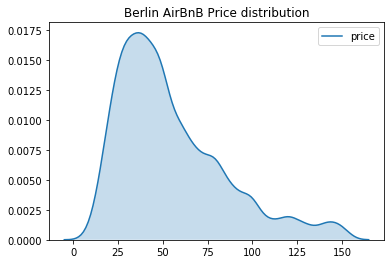

In [7]:
#remove  NAN price attached. Again if there are NAN's I am removing these as I cant attach a commercial 'value' to the related features.
Berlin_data["price"]=Berlin_data["price"].dropna()

#quick sanity check on price data
sns.kdeplot(Berlin_data.price, shade=True, clip=(0, 5000))
plt.title("Berlin AirBnB Price distribution")



Fig2. Looks as expected a peak around a mean and a tail toward 150

In [8]:
# fill bedroom na

Berlin_data["bedrooms_new"]=Berlin_data["bedrooms"].fillna(1)#make the assumption that the min room possible is 1. fill na in room with 1

Berlin_fill=Berlin_data




-------------------------------------------------------------------------------------------------------------------------------

## Section 4: Evaluate the Results.

#### 1]  Which areas are most popular?

#### Bar chart of: count by area.

[Text(0, 0.5, 'Berlin borough'), Text(0.5, 0, 'Number of properties')]

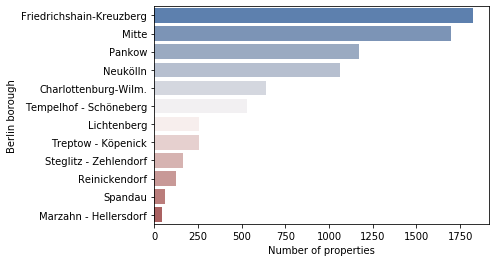

In [9]:
#group by neighbourhood and count up number of items by price
BER_neighbourhood = Berlin_fill.groupby('neighbourhood_group_cleansed', as_index=False).price.count()

#order the data.
BER_neighbourhood=BER_neighbourhood.sort_values(by='price', ascending=False)

#Graph neighbourhood data.
ax=sns.barplot(x='price', y='neighbourhood_group_cleansed', data=BER_neighbourhood,palette="vlag")
ax.set(xlabel="Number of properties", ylabel = "Berlin borough")

Fig3. Looking at the Berlin borough(neighbourhoods) category we see there are two very popular areas, Friedrichshain-Kreuzbergand and Mitte.

#### Map of area by count.

In [10]:
#function to create our default map


def generateBaseMap(default_location=[52.49885, 13.34906], default_zoom_start=12):
    """Function to generate a base map ( from folium.map) with a default location
        in this case Berlin center.
        intial starting zoom is specifed.
        args=location,zoom
        returns:base map"""    
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [11]:
#instantiate our base_map by calling generateBaseMap function.
base_map = generateBaseMap()

#generate a heat map add for base_map
HeatMap(data=Berlin_fill[['latitude', 'longitude', 'property_type']].groupby(['latitude', 'longitude']).count().reset_index().values.tolist(), radius=14, max_zoom=10).add_to(base_map)

#display the base map
base_map

Fig4.This heat map shows the areas of greatest concentration of properties ( note it is possible to zoom for a more detailed area view).

In [12]:
#information on the boroughs of berlin is found in the following Geo JSON file.
belin_boroughs = "https://raw.githubusercontent.com/funkeinteraktiv/Berlin-Geodaten/master/berlin_bezirke.geojson"

#we add this Geo JSON file to the folium.Cloropleth 
folium.Choropleth(
    geo_data=belin_boroughs,
    name='choropleth',
    data=Berlin_data,
    columns=['neighbourhood_group_cleansed', 'price'],
    key_on='feature.properties.name',
    fill_color='RdBu_r',
    fill_opacity=0.1,
    line_opacity=0.5,
    legend = "Mean Average Price (Euro)"
).add_to(base_map)#add to our base_map instance

#display map

base_map

Fig5. This heat map shows the areas of greatest concentration of properties with the boroughs of Berlin overlain. As you would expect the city centre has the most dense concentration of rental properties.

#### 2]  Which is the most popular accomidation type?

       property_type
other            896
                           property_type
Entire apartment                    3445
Private room in apartment           3183
Entire serviced apartment            205
Entire condominium                   104
other                                896


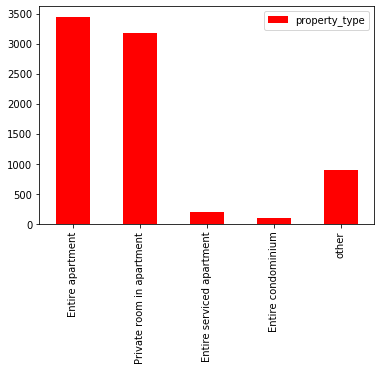

In [13]:
#1st lets find the most popular property type
prop_sum=Berlin_fill.property_type.count()#how many properties in total


prop_count=Berlin_fill.property_type.value_counts()#count for each property type

prop=pd.DataFrame(prop_count[prop_count > 100])#create a data frame for the properties where the count of the property types is >100

main_prop=prop.property_type.sum()# how may properties are there in total where the catagory is >100

prop_other=prop_sum-main_prop# the balance of the total number of properties and the total number of properties in main_prop
PO=[prop_other]
prop_other=pd.DataFrame(PO,index=["other"],columns=["property_type"])#create a data frame with balnce of properties assigned to other.
print(prop_other)

prop=prop.append(prop_other)#append the other catagory to the main catagories.
print(prop)
#graph chart.
prop.plot.bar(color="red")




Fig6. As expected, the vast majority of rental accommodation on offer is entire apartments or private rooms in an apartment, which reflects Berlins status as a large dense city. 

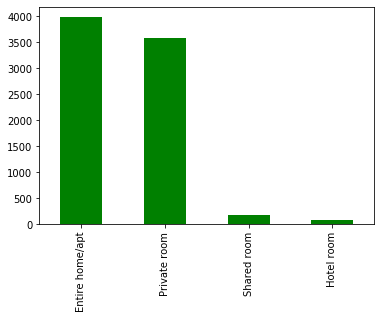

In [14]:
#2nd the most popular room type'

room_count=Berlin_fill.room_type.value_counts()#count for each room type

room_count.plot.bar(color="green")

Fig7. This graph of room type clearly shows there are 2 main options, an entire home/appartment or a private room.

#### 3]  How is the price of accomidation determined by location and accomidaion capacity?

##### Price by location

[Text(0, 0.5, 'Berlin borough'), Text(0.5, 0, 'Mean rental price')]

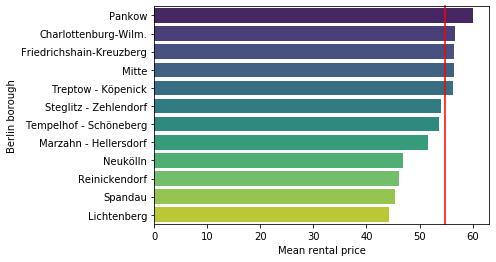

In [15]:


mean_price=Berlin_fill.price.mean()#find the mean price of all properies.

BER_price = Berlin_fill.groupby('neighbourhood_group_cleansed', as_index=False).price.mean()#mean price of each neighbourhood
BER_price=BER_price.sort_values(by='price', ascending=False)#sort

ax=sns.barplot(x='price', y='neighbourhood_group_cleansed', data=BER_price,palette="viridis")#plot.

ax.axvline(mean_price, color="r", clip_on=False)#add in our mean price reference line.
ax.set(xlabel="Mean rental price", ylabel = "Berlin borough")# labels

Fig8. Location is a factor in the mean price of rental accommodation in Berlin. The relationship follows the location logic, boroughs closer to the center of Berlin are slightly more expensive. The red line indicates the over all mean rental accommodation price in berlin at $55.

##### price by accomidates.

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Number of inidividuals accommodated')]

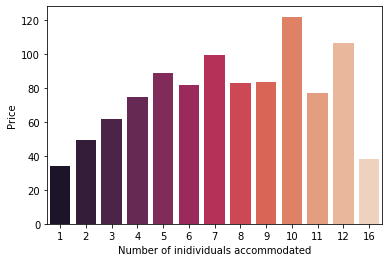

In [16]:
#accommodates: the number of persons a property can accomidate.

BER_accommodates = Berlin_fill.groupby('accommodates', as_index=False).price.mean()#mean price of each accommodates value
BER_accommodates=BER_accommodates.sort_values(by='price', ascending=False)

ax=sns.barplot(x='accommodates', y='price', data=BER_accommodates,palette="rocket")

ax.set(xlabel="Number of inidividuals accommodated", ylabel = "Price")

Fig9. This bar chart illustrates that as the number of persons the accomidation caters for the price increases up to a point. After 6 inidivduals accomidated the trend becomes a little erratic.

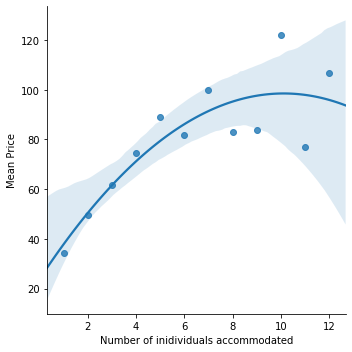

In [17]:
#from the graph above properties where the number that can be accomidated is > 15 the price is unusual
#this may be down to the sample size, the smaller the sample size the more unstable the mean value can be.

BER_accommodates=BER_accommodates[(BER_accommodates['accommodates']<=15)]# only looking at values <=15

#fit a regression line for visual appreciation of the trend.

ax=sns.lmplot(x='accommodates', y='price', data=BER_accommodates,order=2)
ax.set(xlabel="Number of inidividuals accommodated", ylabel = "Mean Price")

Fig10. As you would expect the number of occupants the accommodation caters for the price increases ( graph shows a polynomial of order 2 fitting the data), up to a point. At 6 occupants the price starts to level off while becoming more erratic. In the data set there are smaller numbers of samples where the accommodation offered is greater than 5 which can result in large swings in the mean price.

#### 4] How are reviews distributed?

In [18]:
#create a new data frame containing only host &review relevent data.
berlin_review=Berlin_fill[['host_is_superhost','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].copy()

berlin_review=berlin_review.dropna()#drop any reviews with na, hosts with no reviews.

berlin_review.head()

host_is_superhost  review_scores_rating  review_scores_accuracy  \
2                  f                  89.0                     9.0   
3                  t                  99.0                    10.0   
4                  t                  97.0                    10.0   
7                  f                  94.0                    10.0   
10                 f                  95.0                     9.0   

    review_scores_cleanliness  review_scores_checkin  \
2                         9.0                    9.0   
3                        10.0                   10.0   
4                        10.0                   10.0   
7                        10.0                   10.0   
10                       10.0                   10.0   

    review_scores_communication  review_scores_location  review_scores_value  
2                          10.0                     9.0                  9.0  
3                          10.0                    10.0                 10.0  
4                          10.0                    10.0                  9.0  
7                          10.0                     9.0                  9.0  
10                          9.0                     9.0                  9.0

In [19]:

#clean up any unusual data.    
berlin_review=berlin_review[(berlin_review['review_scores_accuracy']<=10)]
    

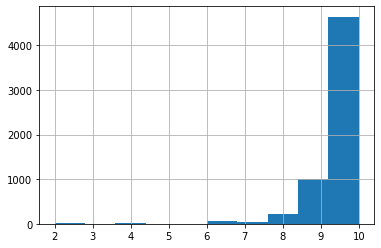

In [20]:
berlin_review['review_scores_accuracy'].hist()#visualise to check clean

Fig11. Historgram to confirm data has been cleaned and no reviews > 10 are in the data set.

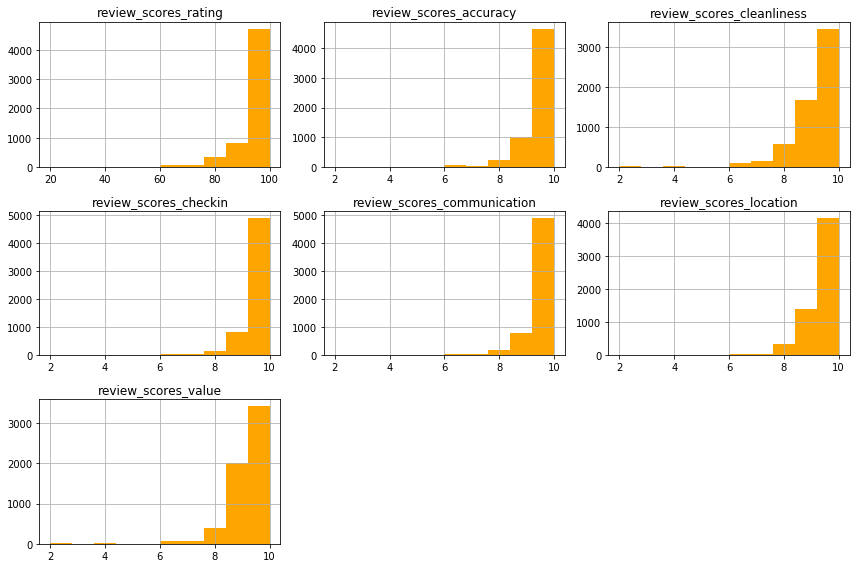

In [21]:
# Checking the distributions of the review ratings columns

#create a list of each variable to plot containing the phrase "review_scores"
variables_to_plot = list(berlin_review.columns[berlin_review.columns.str.startswith("review_scores") == True])

fig = plt.figure(figsize=(12,8))

#loop through our list creating a plot for each variable
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)#add the subplot
    berlin_review[var_name].hist(bins=10,color="orange")#histogram of the variable from our berlin_review table.
    ax.set_title(var_name)
    
fig.tight_layout()#define the layout.
plt.show()

Fig12.  Airbnb offers 7 scoring categories. Rating is a 0–100% band and the others are 0–10 band. Reviews create a reputation for the host which results in higher potential earnings or more bookings. Scoring below 80% or 8 would be poor and from the plots below is unusual. Most reviews for berlin fall into the 100% or 10/10 score, with the exception for the cleanliness and location score which score high in the 9/10 rating. Location may be intuitive however cleanliness may require a follow up analysis which is out side the scope of this project.

#### 5] is worth being a super host?

This is our final question. Given the effort to attain and keep the superhost status:
1] how many are there?
2] do they on average get paid more?

##### Super host type by count.

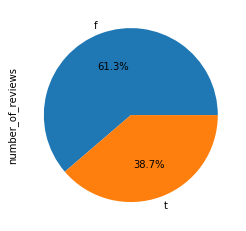

In [22]:
#Create a simple pie chart to illustrate if the host is a superhost.
pie_data = Berlin_fill.groupby("host_is_superhost")["number_of_reviews"].sum()
pie_data
pie_data.plot.pie(autopct="%.1f%%");

Fig13. Superhosts make up 38.8% of rental accommodation providers in berlin on Airbnb.

##### Mean price by superhost.

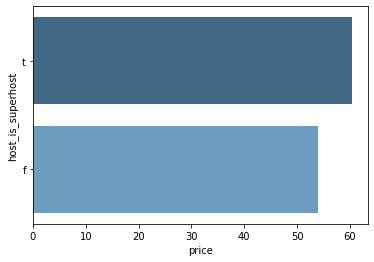

In [23]:
#bar chart by mean price.

BER_SH = Berlin_fill.groupby('host_is_superhost', as_index=False).price.mean()

BER_SH=BER_SH.sort_values(by='price', ascending=False)

sns.barplot(x='price', y='host_is_superhost', data=BER_SH,palette="Blues_d")

Fig14. There are substantially less superhosts however on average they do get a better rental income.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

## Build a baseline Model

In this section we attempt to build a model that shows the main factors. Building a accurate prediction model for this data set would take a considerable amount of time and I am leaving this for another time.

In [24]:
# create a new dataframe to reduce the data set to a more managable size.
#potentially key features will be lost and this will affect the model performance.
#The accuracy of the model may also be linked to the images of the rental poperties and these are not part of the inital data set.


berlin_review=Berlin_fill[['host_id','latitude','accommodates','longitude','host_identity_verified','host_total_listings_count','host_is_superhost','neighbourhood_group_cleansed','number_of_reviews','price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','property_type','room_type','instant_bookable','reviews_per_month']].copy()

#check to ensure we have no nulls
berlin_review=berlin_review.dropna()
nullcheck=berlin_review.isnull().sum()
df_nul=pd.DataFrame(nullcheck)
df_nul.head()


0
host_id                 0
latitude                0
accommodates            0
longitude               0
host_identity_verified  0

In [25]:
berlin_review.head()

host_id  latitude  accommodates  longitude host_identity_verified  \
2      4108  52.49885             1   13.34906                      f   
3     16149  52.51171             2   13.45477                      t   
4     17391  52.54316             2   13.41509                      t   
7     64696  52.50479             5   13.43510                      f   
10    64696  52.50273             4   13.43462                      f   

    host_total_listings_count host_is_superhost neighbourhood_group_cleansed  \
2                         1.0                 f       Tempelhof - Schöneberg   
3                         1.0                 t     Friedrichshain-Kreuzberg   
4                         2.0                 t                       Pankow   
7                         4.0                 f     Friedrichshain-Kreuzberg   
10                        4.0                 f     Friedrichshain-Kreuzberg   

    number_of_reviews  price  ...  review_scores_accuracy  \
2                  27   29.0  ...                     9.0   
3                 135   79.0  ...                    10.0   
4                 293   33.0  ...                    10.0   
7                  48   90.0  ...                    10.0   
10                 60   70.0  ...                     9.0   

    review_scores_cleanliness  review_scores_checkin  \
2                         9.0                    9.0   
3                        10.0                   10.0   
4                        10.0                   10.0   
7                        10.0                   10.0   
10                       10.0                   10.0   

    review_scores_communication  review_scores_location  review_scores_value  \
2                          10.0                     9.0                  9.0   
3                          10.0                    10.0                 10.0   
4                          10.0                    10.0                  9.0   
7                          10.0                     9.0                  9.0   
10                          9.0                     9.0                  9.0   

                property_type        room_type instant_bookable  \
2   Private room in apartment     Private room                f   
3                 Entire loft  Entire home/apt                f   
4   Private room in apartment     Private room                t   
7            Entire apartment  Entire home/apt                f   
10           Entire apartment  Entire home/apt                f   

   reviews_per_month  
2               0.29  
3               1.01  
4               2.09  
7               0.37  
10              0.47  

[5 rows x 21 columns]

In [26]:
#lets go ahead and one hot our categorical variables for modeling;

berlin_review=pd.get_dummies(berlin_review)
berlin_review.head()

host_id  latitude  accommodates  longitude  host_total_listings_count  \
2      4108  52.49885             1   13.34906                        1.0   
3     16149  52.51171             2   13.45477                        1.0   
4     17391  52.54316             2   13.41509                        2.0   
7     64696  52.50479             5   13.43510                        4.0   
10    64696  52.50273             4   13.43462                        4.0   

    number_of_reviews  price  review_scores_rating  review_scores_accuracy  \
2                  27   29.0                  89.0                     9.0   
3                 135   79.0                  99.0                    10.0   
4                 293   33.0                  97.0                    10.0   
7                  48   90.0                  94.0                    10.0   
10                 60   70.0                  95.0                     9.0   

    review_scores_cleanliness  ...  property_type_Shared room in hostel  \
2                         9.0  ...                                    0   
3                        10.0  ...                                    0   
4                        10.0  ...                                    0   
7                        10.0  ...                                    0   
10                       10.0  ...                                    0   

    property_type_Shared room in house  property_type_Shared room in loft  \
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   
7                                    0                                  0   
10                                   0                                  0   

    property_type_Tiny house  room_type_Entire home/apt  room_type_Hotel room  \
2                          0                          0                     0   
3                          0                          1                     0   
4                          0                          0                     0   
7                          0                          1                     0   
10                         0                          1                     0   

    room_type_Private room  room_type_Shared room  instant_bookable_f  \
2                        1                      0                   1   
3                        0                      0                   1   
4                        1                      0                   0   
7                        0                      0                   1   
10                       0                      0                   1   

    instant_bookable_t  
2                    0  
3                    0  
4                    1  
7                    0  
10                   0  

[5 rows x 85 columns]

In [27]:
#review data to eyeball outliers
berlin_review.describe()

host_id     latitude  accommodates    longitude  \
count  5.997000e+03  5997.000000   5997.000000  5997.000000   
mean   7.464598e+07    52.509960      2.547774    13.404441   
std    8.930077e+07     0.031361      1.329325     0.060348   
min    1.581000e+03    52.340410      1.000000    13.117600   
25%    8.318509e+06    52.489590      2.000000    13.371840   
50%    3.611068e+07    52.509520      2.000000    13.415220   
75%    1.132156e+08    52.532590      3.000000    13.438700   
max    3.823950e+08    52.640680     16.000000    13.721410   

       host_total_listings_count  number_of_reviews        price  \
count                5997.000000        5997.000000  5997.000000   
mean                    4.107054          24.937135    54.508087   
std                    24.713094          47.613082    29.555961   
min                     0.000000           1.000000    10.000000   
25%                     1.000000           3.000000    32.000000   
50%                     1.000000           7.000000    47.000000   
75%                     2.000000          23.000000    70.000000   
max                  1111.000000         618.000000   150.000000   

       review_scores_rating  review_scores_accuracy  \
count           5997.000000             5997.000000   
mean              94.597632                9.664832   
std                8.258944                0.813322   
min               20.000000                2.000000   
25%               93.000000               10.000000   
50%               97.000000               10.000000   
75%              100.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  ...  property_type_Shared room in hostel  \
count                5997.000000  ...                          5997.000000   
mean                    9.333167  ...                             0.015508   
std                     1.042967  ...                             0.123571   
min                     2.000000  ...                             0.000000   
25%                     9.000000  ...                             0.000000   
50%                    10.000000  ...                             0.000000   
75%                    10.000000  ...                             0.000000   
max                    10.000000  ...                             1.000000   

       property_type_Shared room in house  property_type_Shared room in loft  \
count                         5997.000000                        5997.000000   
mean                             0.000334                           0.000167   
std                              0.018260                           0.012913   
min                              0.000000                           0.000000   
25%                              0.000000                           0.000000   
50%                              0.000000                           0.000000   
75%                              0.000000                           0.000000   
max                              1.000000                           1.000000   

       property_type_Tiny house  room_type_Entire home/apt  \
count               5997.000000                5997.000000   
mean                   0.001001                   0.493080   
std                    0.031617                   0.499994   
min                    0.000000                   0.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                   0.000000   
75%                    0.000000                   1.000000   
max                    1.000000                   1.000000   

       room_type_Hotel room  room_type_Private room  room_type_Shared room  \
count           5997.000000             5997.000000            5997.000000   
mean               0.010672                0.471236               0.025013   
std                0.102761                0.499214               0.156176   
min                0.000000             

In [28]:

#from the describe function its is obivious there are some outliers.
#function fo remove outliers based on a z score band

def outlier_removal(df, z_level=3):
    """function to remove outliers based on z score level
        default z level 3"""
    
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    
    bands = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_level, reduce=False) \
        .all(axis=1)
    
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~bands], inplace=True)
    

In [29]:
#call our function to remove outliers from our dataframe
outlier_removal(berlin_review)

#visualize again to check outliers max and min values from mean have been removed

berlin_review.describe()

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The reduce argument is deprecated and will be removed in a future version. You can specify result_type='reduce' to try to reduce the result to the original dimensions
  # This is added back by InteractiveShellApp.init_path()


host_id     latitude  accommodates    longitude  \
count  3.479000e+03  3479.000000   3479.000000  3479.000000   
mean   6.536758e+07    52.514392      2.395803    13.417111   
std    7.814232e+07     0.026947      1.033646     0.032839   
min    1.581000e+03    52.419390      1.000000    13.316450   
25%    8.327260e+06    52.492040      2.000000    13.399450   
50%    3.126800e+07    52.513430      2.000000    13.422730   
75%    9.522018e+07    52.536310      3.000000    13.439310   
max    3.410121e+08    52.592240      6.000000    13.499250   

       host_total_listings_count  number_of_reviews        price  \
count                3479.000000        3479.000000  3479.000000   
mean                    1.687841          17.789020    53.338316   
std                     3.744000          26.974671    26.150287   
min                     0.000000           1.000000    10.000000   
25%                     1.000000           3.000000    35.000000   
50%                     1.000000           7.000000    48.000000   
75%                     1.000000          19.000000    69.000000   
max                    46.000000         167.000000   143.000000   

       review_scores_rating  review_scores_accuracy  \
count           3479.000000             3479.000000   
mean              96.138258                9.796781   
std                4.906618                0.458554   
min               70.000000                8.000000   
25%               94.000000               10.000000   
50%               98.000000               10.000000   
75%              100.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  ...  property_type_Shared room in hostel  \
count                3479.000000  ...                               3479.0   
mean                    9.455591  ...                                  0.0   
std                     0.747410  ...                                  0.0   
min                     7.000000  ...                                  0.0   
25%                     9.000000  ...                                  0.0   
50%                    10.000000  ...                                  0.0   
75%                    10.000000  ...                                  0.0   
max                    10.000000  ...                                  0.0   

       property_type_Shared room in house  property_type_Shared room in loft  \
count                              3479.0                             3479.0   
mean                                  0.0                                0.0   
std                                   0.0                                0.0   
min                                   0.0                                0.0   
25%                                   0.0                                0.0   
50%                                   0.0                                0.0   
75%                                   0.0                                0.0   
max                                   0.0                                0.0   

       property_type_Tiny house  room_type_Entire home/apt  \
count                    3479.0                3479.000000   
mean                        0.0                   0.497844   
std                         0.0                   0.500067   
min                         0.0                   0.000000   
25%                         0.0                   0.000000   
50%                         0.0                   0.000000   
75%                         0.0                   1.000000   
max                         0.0                   1.000000   

       room_type_Hotel room  room_type_Private room  room_type_Shared room  \
count                3479.0             3479.000000                 3479.0   
mean                    0.0                0.502156                    0.0   
std                     0.0                0.500067                    0.0   
min                     0.0             

#### Check which items are highly correlated.

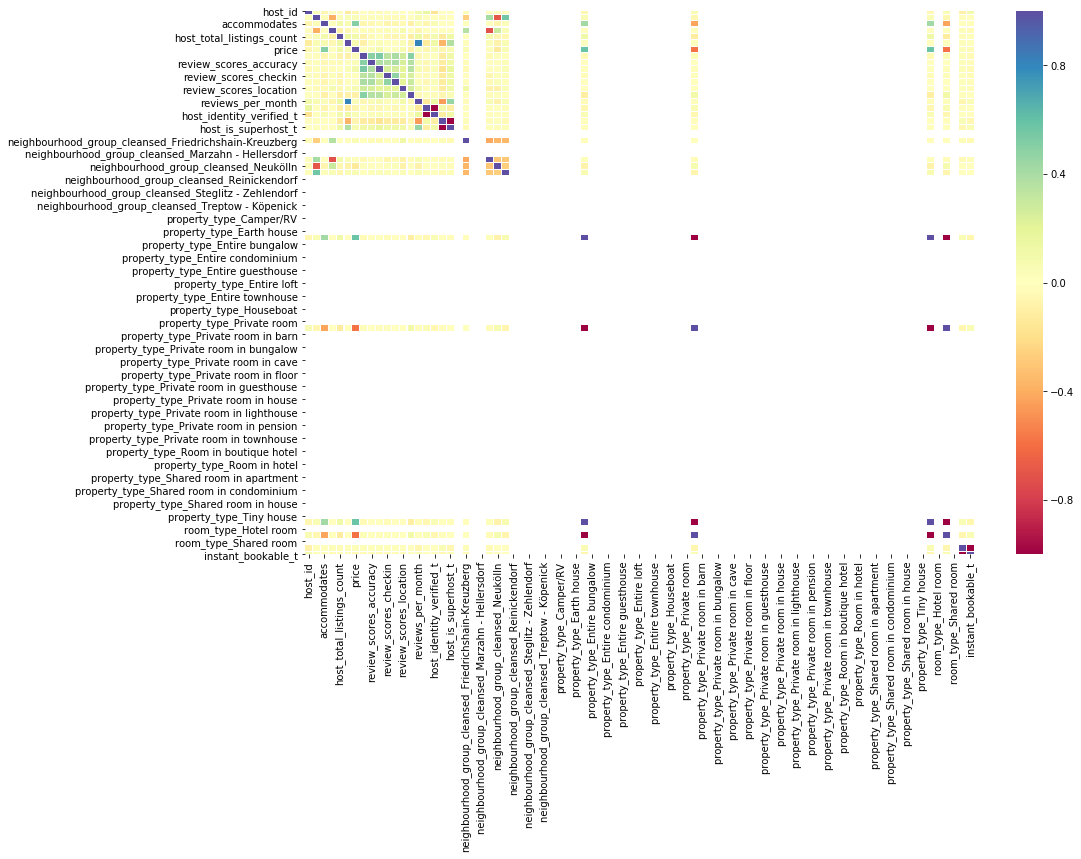

In [30]:
#create table of a correlation matrix
corrmat = berlin_review.corr() 
  
f, ax = plt.subplots(figsize=(15,10))
#plot seaborn heat map
sns.heatmap(corrmat, ax = ax, cmap ="Spectral", linewidths = 0.1)

Fig15. As we can see there are number of items which are highly correlated and items which are mildy correlated. lets include them in our model for now and we can remove some these correlated items later if required

## XGB baseline model to examine main factors.

In [31]:
#split data into features and target.
Berlin_features = berlin_review.drop(['price'], axis=1)
Berlin_features

Berlin_target=berlin_review[['price']].copy()
Berlin_target

price
7       90.0
10      70.0
14     135.0
15      90.0
17      80.0
...      ...
19764   57.0
19785   37.0
19820   20.0
19839   55.0
19892   30.0

[3479 rows x 1 columns]

In [32]:
#split data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(Berlin_features, Berlin_target, test_size=0.6, random_state=3)

In [33]:
#Create and xbg instance
xgb_reg = xgb.XGBRegressor()

# Fitting the model
xgb_reg.fit(X_train, y_train)

training_preds_xgb_reg = xgb_reg.predict(X_train)

val_preds_xgb_reg = xgb_reg.predict(X_test)

## Evaluation


Training MSE: 10.7741
Validation MSE: 447.0039

Training r2: 0.9846
Validation r2: 0.336


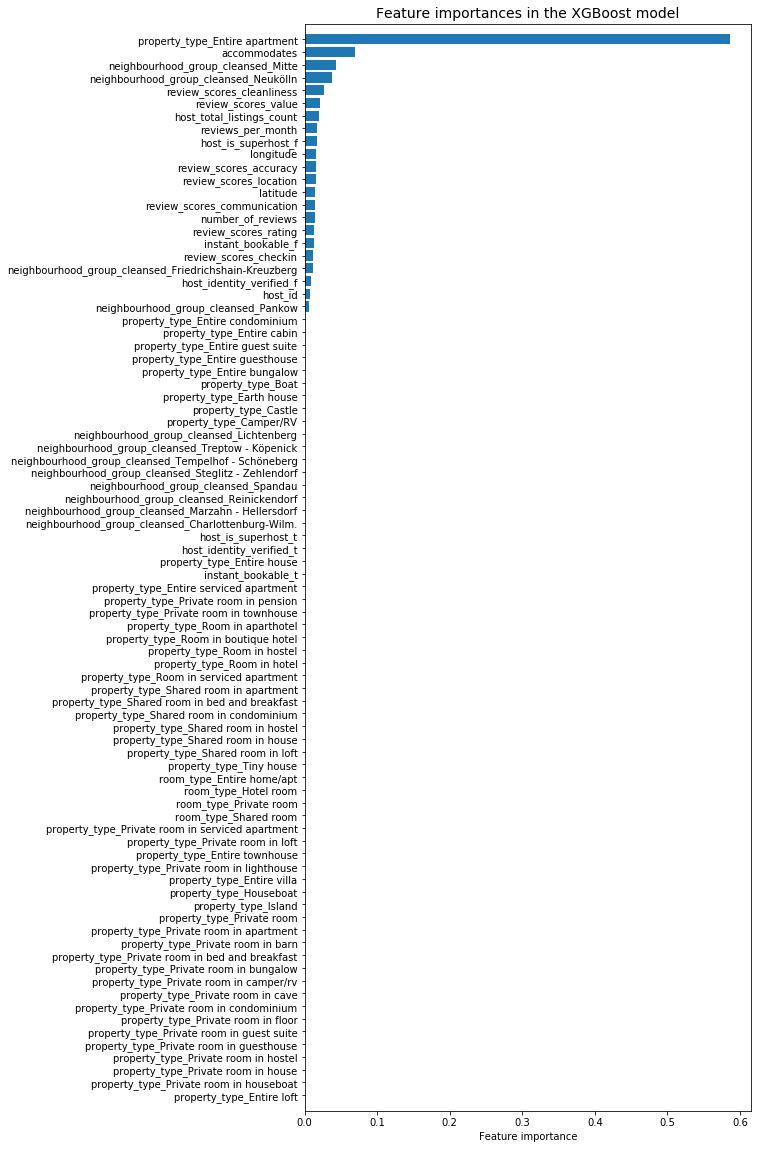

In [34]:


# Printing the results
#print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

Fig16. The results for the model are:
Training r2: 0.9846
Validation r2: 0.336

On the training data this is clearly an over fitting model and we can see how badly it preforms on the validation/test set.

The features which the XGB model selects where are of most importance to predict price are:

1]Property Entire Apartment.

2]Accommodates-the number of people accommodated.

3]neighbourhood-Mitte.

While the model this did not perform very well on the test set, it is intuitive that the features selected are some of the most important as they surfaced during the Evaluate the results phase in various questions.


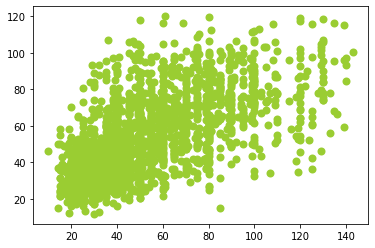

In [35]:
plt.scatter(y_test, val_preds_xgb_reg, color="yellowgreen", label="max_depth=5", linewidth=2)



Fig17. Vizualise the results: Plotting the actual results of the test set against the predicted results shows that the model cant not fit the data set and this confirms the results for the validation set shown above.

### In conclusion 

Our model over fits the training data and performs very poorly on the test set. Tuning the model parameters and add additional features would be a next step. 

However our intrest is in the feature importance, which lists the following features are the main inputs into predicting the price: 

property_type_entire_appartment, 

accomidates, 

value 

and so on.